In [1]:
## Once yfinance is installed, you can use the following code to download historical data for your 7 assets.

# Load libraries
from IPython.display import display
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statistics

# Create a list of assets (update this with your chosen assets):
stock_tickers = ['C', 'DB', 'GE', 'GM', 'MS', 'NVDA', 'RYCEY']


# Assign a start date and end date for the data download, 10 years of data
start_date = dt.datetime.today() - pd.Timedelta(730, "d")
end_date = dt.datetime.today()

# Download the data using the above variables
stock_port = yf.download(start=start_date, end=end_date, tickers = stock_tickers)['Adj Close'].sort_values(by='Date',ascending=False)

[*********************100%%**********************]  7 of 7 completed


,Mean Returns(%),Variance in Returns (%)
Ticker,,
C,0.000704,0.000272
DB,0.001077,0.000412
GE,0.002438,0.000297
GM,0.000423,0.000419
MS,0.000750,0.000250
NVDA,0.004156,0.001023
RYCEY,0.003861,0.000577


Ticker,C,DB,GE,GM,MS,NVDA,RYCEY
Ticker,,,,,,,
C,1.000000,0.481292,0.338570,0.539446,0.656286,0.241300,0.355970
DB,0.481292,1.000000,0.325756,0.347725,0.502142,0.247113,0.317722
GE,0.338570,0.325756,1.000000,0.214110,0.342501,0.361609,0.314216
GM,0.539446,0.347725,0.214110,1.000000,0.521782,0.229078,0.192457
MS,0.656286,0.502142,0.342501,0.521782,1.000000,0.290539,0.309838
NVDA,0.241300,0.247113,0.361609,0.229078,0.290539,1.000000,0.320757
RYCEY,0.355970,0.317722,0.314216,0.192457,0.309838,0.320757,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

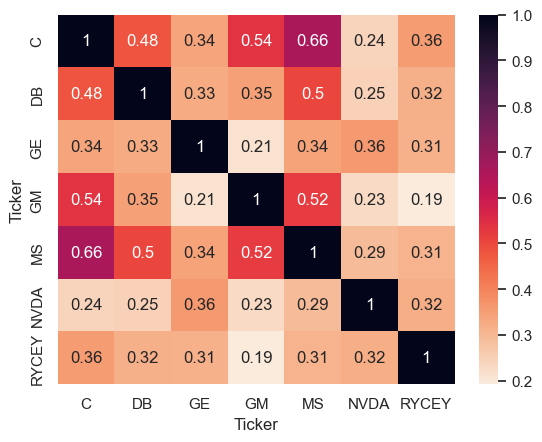

In [2]:
# Calculate the mean
mean_returns = (stock_port.head(504).pct_change().mean())*(-1)
# Calculate the variance
variance_returns = stock_port.head(504).pct_change().var()
# Display Results
data_1 = {"Mean Returns(%)": mean_returns, "Variance in Returns (%)": variance_returns}
table = pd.DataFrame(data_1)
display(table)
# Calculate Correlation Matrix
correlation_of_returns = stock_port.head(504).pct_change().corr()
display(correlation_of_returns)
# Heatmap of correlation matrix...pretty useless but let's show some colors
sns.heatmap(correlation_of_returns, annot=True, cmap="rocket_r")

In [3]:
class Portfolio:
    def __init__(self, weights):
        self.weights = weights
        
        # RETURNS
    def daily_return_avg(self):
        portfolio_table = table.mul(self.weights, axis=0)
        #display(portfolio_table)
        return_portfolio = portfolio_table["Mean Returns(%)"].sum()*252
        return return_portfolio
        
        #VOLATILITY
    def volatility(self):
        covariance_of_returns = ((stock_port.head(504).pct_change()).mul(self.weights, axis = 1)*21).cov()
        volatility = np.sqrt(covariance_of_returns.sum().sum())
        return volatility

        #SHARPE
    def sharpe(self):
        sharpe = self.daily_return_avg()/self.volatility()
        return sharpe



In [10]:

# Funtion for random Protfolio Distributions
def genrand_array(n):

    # n random numbers
    random_numbers = np.random.rand(n)
    
    # Normalize 
    random_array = random_numbers / random_numbers.sum()
    
    return random_array

# Number of random Portfolios
number_trials = 12000

#Set Up Arrays to safe Outcomes
all_weights = np.zeros((number_trials,7))
returns = np.zeros(number_trials)
volatilities = np.zeros(number_trials)
sharpes = np.zeros(number_trials)

#Run Tests

for i in range(number_trials):


    # Generate distribution of positions
    weights = genrand_array(7)
    
    # Generate Test Portfolio instance
    test_p = Portfolio(weights)
    
    # Save Weights
    all_weights[i,:] = weights

    # Save expected Return
    returns[i] = test_p.daily_return_avg()

    # Save Volatility
    volatilities[i] = test_p.volatility()

    # Sharpe Ratio
    sharpes[i] = test_p.sharpe()



In [32]:
# Find Portfolio with max. sharpe ratio

# Highest Sharpe Ratio
sharpe_max = sharpes.max()

# Portfolio number that has higherst Sharpe Ratio
opt_pf_number = sharpes.argmax()

# Portfolio Weights of Portfolio with highest Sharpe Ratio
weights_dis = (all_weights[opt_pf_number,:])
#Portfolio with minimum volatility
Vol_min = volatilities.argmin()


2.2210019939204817
2604
[0.0529912  0.11462573 0.33512351 0.01770319 0.00776677 0.16441346
 0.30737614]


We look at the mean and variance of the returns of the individual assets first.


,Mean Returns(%),Variance in Returns (%)
Ticker,,
C,0.000704,0.000272
DB,0.001077,0.000412
GE,0.002438,0.000297
GM,0.000423,0.000419
MS,0.000750,0.000250
NVDA,0.004156,0.001023
RYCEY,0.003861,0.000577


Now, let's take a look at how their price changes are connected.


Ticker,C,DB,GE,GM,MS,NVDA,RYCEY
Ticker,,,,,,,
C,1.000000,0.481292,0.338570,0.539446,0.656286,0.241300,0.355970
DB,0.481292,1.000000,0.325756,0.347725,0.502142,0.247113,0.317722
GE,0.338570,0.325756,1.000000,0.214110,0.342501,0.361609,0.314216
GM,0.539446,0.347725,0.214110,1.000000,0.521782,0.229078,0.192457
MS,0.656286,0.502142,0.342501,0.521782,1.000000,0.290539,0.309838
NVDA,0.241300,0.247113,0.361609,0.229078,0.290539,1.000000,0.320757
RYCEY,0.355970,0.317722,0.314216,0.192457,0.309838,0.320757,1.000000


We evaluated the portfolio with the highest return to risk ratio and those are the allocations.


,Company,Weight
0,C,0.052991
1,DB,0.114626
2,GE,0.335124
3,GM,0.017703
4,MS,0.007767
5,NVDA,0.164413
6,RYCEY,0.307376


The stats for that portfolio are below.


,Statistic,Output
0,Optimal Portfolio #,2604.000000
1,Sharpe,2.221002
2,Return,0.721017
3,Volatility,0.324636


Take a look at the efficient frontier. The red point marks our ideal portfolio. The blue dot marks the portfolio of least volatility.


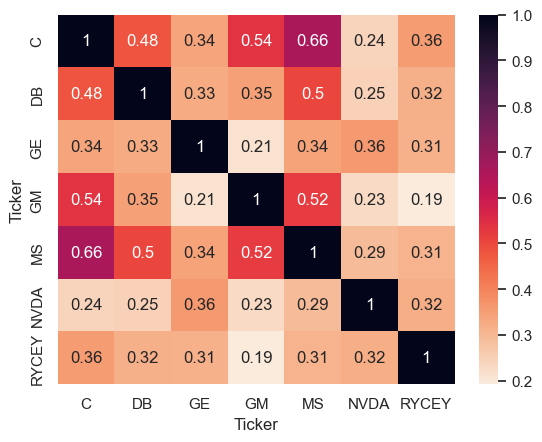

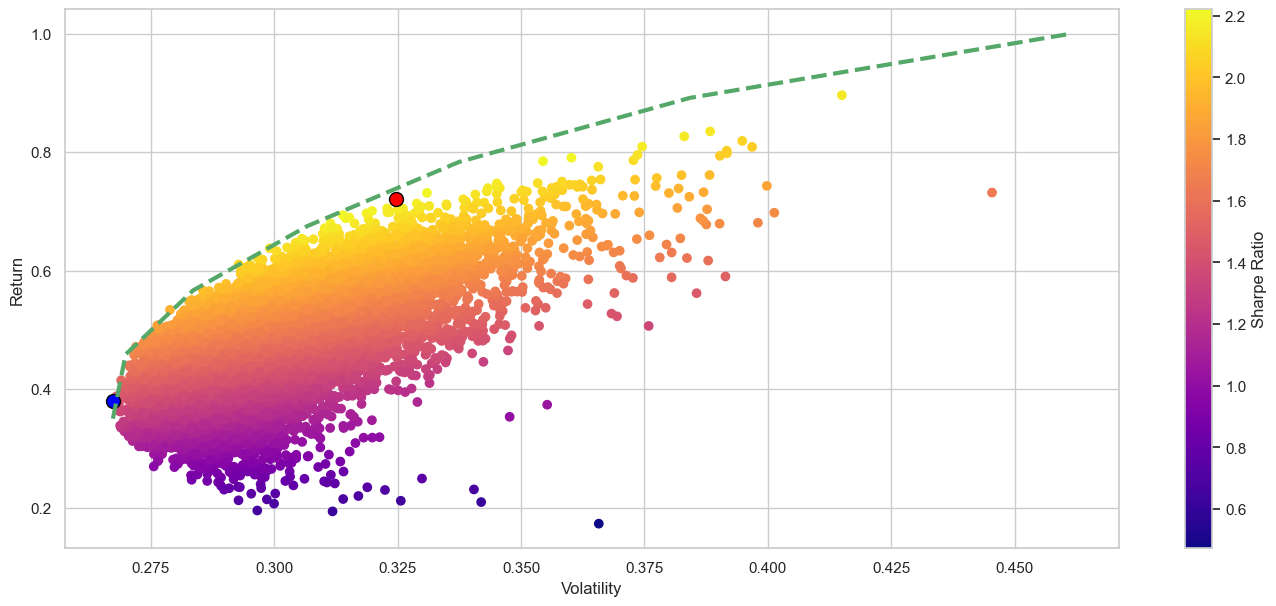

In [35]:
#SUMMARY
print("We look at the mean and variance of the returns of the individual assets first.")
display(table)
print("Now, let's take a look at how their price changes are connected.")
display(correlation_of_returns)
sns.heatmap(correlation_of_returns, annot=True, cmap="rocket_r")

print("We evaluated the portfolio with the highest return to risk ratio and those are the allocations.")
data_2 = {"C": weights_dis[0],'DB': weights_dis[1], 'GE': weights_dis[2], 'GM': weights_dis[3], 'MS': weights_dis[4], 'NVDA': weights_dis[5], 'RYCEY': weights_dis[6]}
# Convert the dictionary to a DataFrame
optimal_weights_pf = pd.DataFrame(list(data_2.items()), columns=['Company', 'Weight'])

# Display the DataFrame
display(optimal_weights_pf)

print("The stats for that portfolio are below.")
data_3 = {"Optimal Portfolio #": opt_pf_number, "Sharpe": sharpes[opt_pf_number], 'Return': returns[opt_pf_number], 'Volatility': volatilities[opt_pf_number]}
# Convert the dictionary to a DataFrame
optimal_weights_stats = pd.DataFrame(list(data_3.items()), columns=['Statistic', 'Output'])
display(optimal_weights_stats)

print("Take a look at the efficient frontier. The red point marks our ideal portfolio. The blue dot marks the portfolio of least volatility.")

# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0.35,1, 7) 
init_guess = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
def minimize_volatility(weights):
    return  Portfolio(weights).volatility()
def check_sum(weights):
    return np.sum(weights) - 1
frontier_volatility = []
for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: Portfolio(w).daily_return_avg() - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
max_sr_ret = returns[opt_pf_number]
max_sr_vol = volatilities[opt_pf_number]
min_vol_ret = returns[Vol_min]
min_vol_vol =volatilities[Vol_min]
plt.figure(figsize=(17,7))
plt.scatter(volatilities,returns,c=sharpes,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')
# Add blue dot for min Volatility
plt.scatter(min_vol_vol,min_vol_ret,c='blue',s=100,edgecolors='black')